In [1]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)





#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


Question1
            

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_waveform(X: pd.DataFrame, y: pd.Series, num_rows: int = 3, num_cols: int = 2) -> None:
    """
    Plots the waveform for each activity class
    :param X: The input features extracted from MakeDataset.py
    :param y: The labels for the input features extracted from MakeDataset.py
    :param num_rows: Number of rows in the plot
    :param num_cols: Number of columns in the plot
    """
    columns = [f'axis_{axis}_{i}' for axis in ['x', 'y', 'z'] for i in range(500)]
    df = pd.DataFrame(X.reshape((X.shape[0], -1)), columns=columns)
    df['activity_class'] = y
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    axes = np.ravel(axes)
    activity_classes = df['activity_class'].unique()
    activity_classes.sort()

    activity = {1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"}

    for i, activity_class in enumerate(activity_classes):
        activity_df = df[df['activity_class'] == activity_class].drop('activity_class', axis=1)
        activity_mean = activity_df.mean()
        axes[i].plot(activity_mean)
        axes[i].set_xticks([])
        axes[i].set_title(f'{activity[activity_class]}')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Acceleration')

    plt.tight_layout()
    plt.show()


C:\Users\abhin\AppData\Local\Temp\ipykernel_39916\297586530.py:26: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axes[i].set_xticks([])
C:\Users\abhin\AppData\Local\Temp\ipykernel_39916\297586530.py:26: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axes[i].set_xticks([])
C:\Users\abhin\AppData\Local\Temp\ipykernel_39916\297586530.py:26: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axes[i].set_xticks([])
C:\Users\abhin\AppData\Local\Temp\ipykernel_39916\297586530.py:26: MatplotlibDeprecationWarning: Support for passing numbers through unit converters

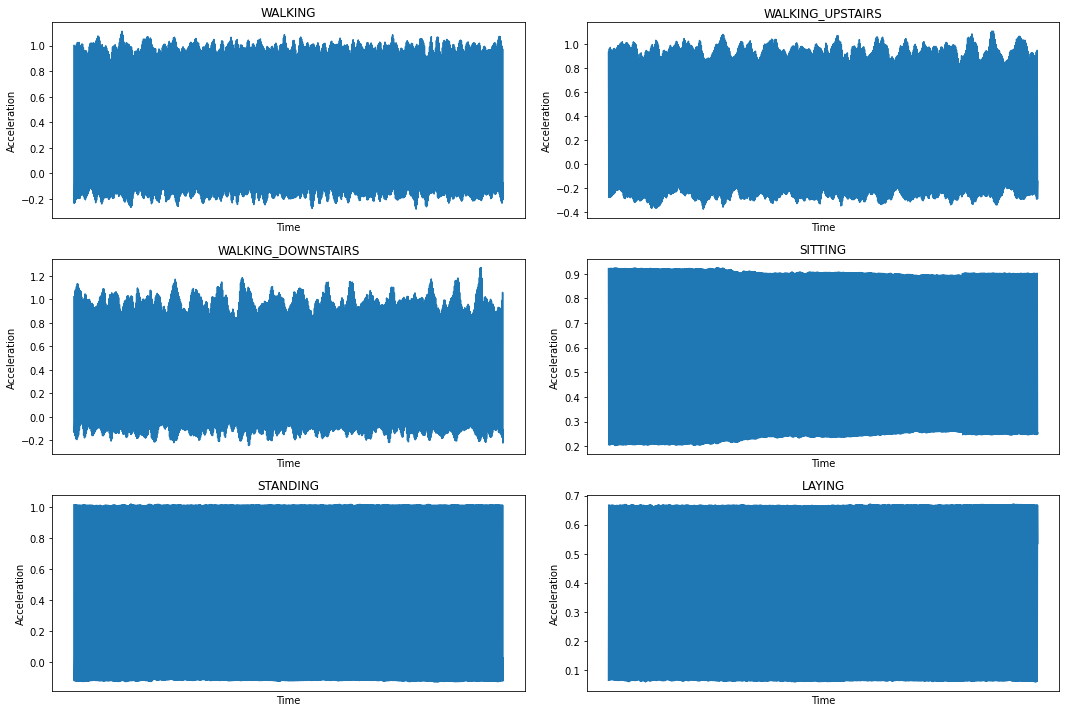

In [3]:
plot_waveform(X_train, y_train)

Based on the above plots, it is clear that for dynamic activities, the wavefrom have variations while for static activites the waveform is constant.

Question 2 :

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_activity_acceleration(X: np.ndarray, y: np.ndarray, rows: int = 3, cols: int = 2) -> None:

    # Compute the magnitude of linear acceleration
    acceleration_magnitude = np.sqrt(np.sum(np.square(X), axis=2))

    # Create a DataFrame for easier plotting
    acceleration_df = pd.DataFrame(acceleration_magnitude, columns=[f"accel_{i}" for i in range(acceleration_magnitude.shape[1])])
    acceleration_df['activity'] = y

    # Create subplots for each activity
    fig, subplot_axes = plt.subplots(rows, cols, figsize=(20, 15))
    subplot_axes = subplot_axes.flatten()

    # Define activity labels
    activity_labels = {
        1: "WALKING",
        2: "WALKING_UPSTAIRS",
        3: "WALKING_DOWNSTAIRS",
        4: "SITTING",
        5: "STANDING",
        6: "LAYING"
    }

    # Plot the average linear acceleration for each activity class
    for index, activity_class in enumerate(sorted(acceleration_df['activity'].unique())):
        class_df = acceleration_df[acceleration_df['activity'] == activity_class].drop(columns='activity')
        avg_acceleration = class_df.mean()

        subplot_axes[index].plot(avg_acceleration)
        subplot_axes[index].set_title(f'{activity_labels[activity_class]}')
        subplot_axes[index].set_xlabel('Time')
        subplot_axes[index].set_ylabel('Acceleration')
        subplot_axes[index].set_xticks([])

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()


C:\Users\abhin\AppData\Local\Temp\ipykernel_39916\3039304124.py:37: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  subplot_axes[index].set_xticks([])
C:\Users\abhin\AppData\Local\Temp\ipykernel_39916\3039304124.py:37: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  subplot_axes[index].set_xticks([])
C:\Users\abhin\AppData\Local\Temp\ipykernel_39916\3039304124.py:37: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  subplot_axes[index].set_xticks([])
C:\Users\abhin\AppData\Local\Temp\ipykernel_39916\3039304124.py:37: MatplotlibDeprecationWarning: Support for

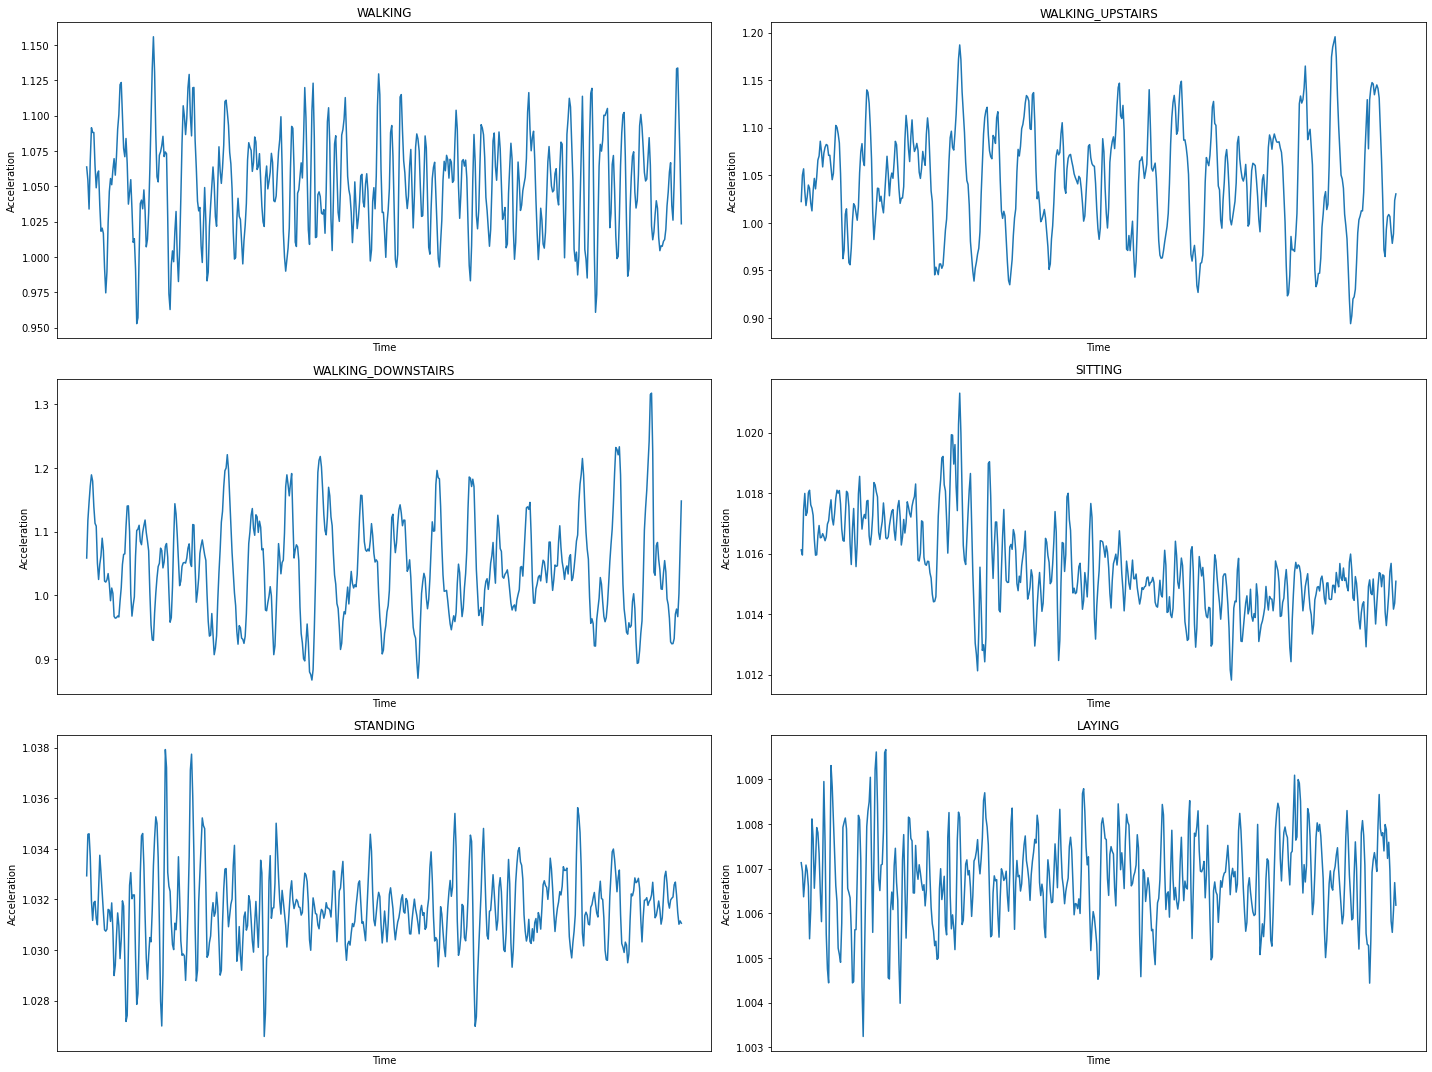

In [5]:
plot_activity_acceleration(X_train, y_train)

The difference between static and dynamic activities is clearly visible in the plots.The linear acceleration for each activity is different. So we don't need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs).

Question3

3.1


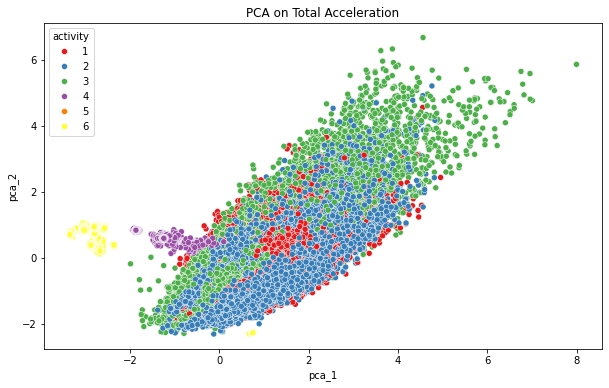

In [7]:
def preprocess_data(X: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
    """
    Preprocesses the data by flattening the input features and adding the labels
    :param X: The input features extracted from MakeDataset.py
    :param y: The labels for the input features extracted from MakeDataset.py
    :return: The preprocessed data
    """
    df = pd.DataFrame(X.reshape(-1, 3), columns=['accx', 'accy', 'accz'])
    df['activity'] = np.repeat(y, 500)
    return df

train_df = preprocess_data(X_train, y_train)
test_df = preprocess_data(X_test, y_test)


train_df.head()

train_df['linear_acceleration'] = np.sum(X_train ** 2, axis=2).reshape(-1)
test_df['linear_acceleration'] = np.sum(X_test ** 2, axis=2).reshape(-1)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df.drop('activity', axis=1))
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(train_df_scaled), columns=['pca_1', 'pca_2'])
pca_df['activity'] = train_df['activity']
pca_df.head()

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='activity', data=pca_df, palette='Set1')
plt.title('PCA on Total Acceleration')
plt.show()

3.2

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


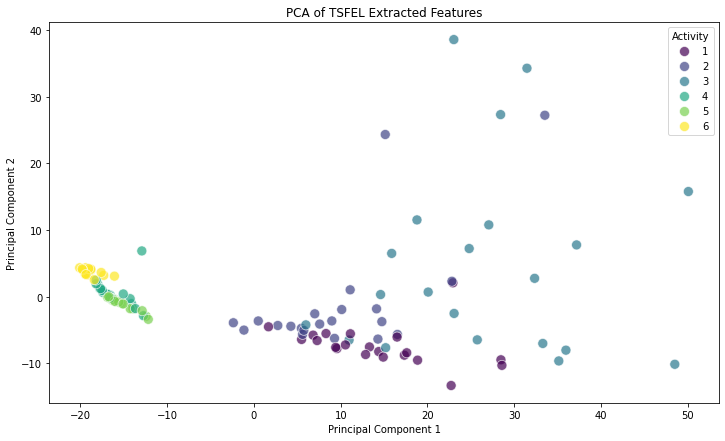

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tsfel
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Assuming X_train, X_test, and y_train are already available

def extract_features(X: np.ndarray, y: np.ndarray, fs: int = 50, window_size: int = 500) -> pd.DataFrame:

    cfg = tsfel.get_features_by_domain()

    # Prepare data for feature extraction
    num_samples = X.shape[0]
    features_list = []
    labels = []

    for i in range(num_samples):
        sample = X[i, :, :]  # Select a single sample
        # Extract features for each axis (x, y, z) with specified sampling frequency and window size
        features = tsfel.time_series_features_extractor(cfg, sample, fs=fs, window_size=window_size)
        features_list.append(features)
        labels.append(y[i])

    # Combine all features into a single DataFrame
    features_df = pd.concat(features_list, ignore_index=True)
    features_df['activity'] = np.repeat(labels, features_df.shape[0] // num_samples)

    return features_df

# Extract features from data with specific sampling frequency and window size
train_features = extract_features(X_train, y_train, fs=250, window_size=500)

# Prepare data for PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_features.drop('activity', axis=1))

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['component_1', 'component_2'])
pca_df['activity'] = train_features['activity']

# Plot the PCA results
plt.figure(figsize=(12, 7))
sns.scatterplot(x='component_1', y='component_2', hue='activity', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA of TSFEL Extracted Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity')
plt.show()


3.3

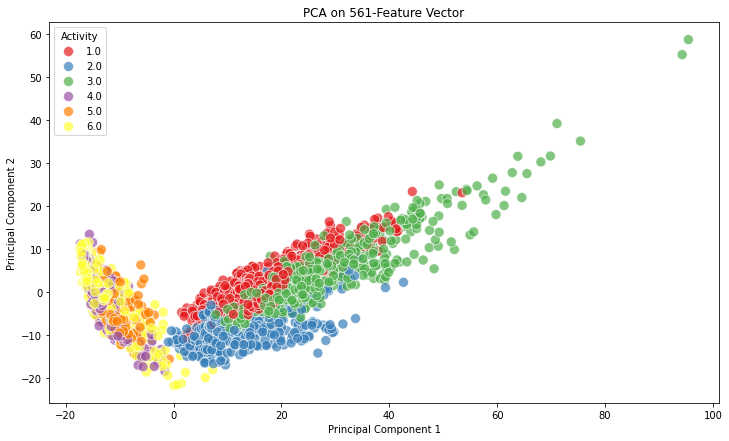

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the data
# Replace the path with your own file paths if necessary
X_train = np.loadtxt("HAR/UCI HAR Dataset/train/X_train.txt")
y_train = np.loadtxt("HAR/UCI HAR Dataset/train/y_train.txt")

# If X_train is 3D, reshape it to 2D by flattening the time series dimension
if X_train.ndim == 3:
    n_samples, n_time_steps, n_features = X_train.shape
    X_train = X_train.reshape(n_samples, -1)

# Step 2: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Standardizing the features

# Step 3: Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Step 4: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(X_pca, columns=['component_1', 'component_2'])
pca_df['activity'] = y_train

# Step 5: Plot the PCA results
plt.figure(figsize=(12, 7))
sns.scatterplot(x='component_1', y='component_2', hue='activity', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA on 561-Feature Vector')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity')
plt.show()

3.4:

Overall, TSFEL offers more detailed and insightful visualizations, making it easy for understanding complex  patterns.Total Acceleration is the least effective for visualization in this case, as it oversimplifies the data and difficult to distinguish between different activities. Original Features also found effective, especially if the data is well-prepared and meaningful features are included.

Question 4

In [12]:
X_train.shape

(7352, 561)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tsfel
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Assuming X_train, X_test, and y_train are already available



# Step 1: Extract features using TSFEL
# train_features_tsfel = extract_features(X_train, y_train, fs=250, window_size=500)

# Step 2: Define dataset_features if not already defined
# Example: Flattening X_train to get original features (assuming X_train has shape [samples, timesteps, features])
n_samples, n_timesteps, n_features = X_train.shape
dataset_features = pd.DataFrame(X_train.reshape(n_samples * n_timesteps, n_features),
                                columns=[f'feature_{i}' for i in range(n_features)])

# Combine TSFEL features with original dataset features
combined_features = pd.concat([train_features.drop('activity', axis=1), dataset_features], axis=1)

# Step 3: Calculate the correlation matrix
correlation_matrix = combined_features.corr()

# Step 4: Visualize the correlation matrix (optional but recommended)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of TSFEL and Dataset Features')
plt.show()

# Step 5: Identify highly correlated features (threshold > 0.9 or < -0.9)
threshold = 0.9
high_corr_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[0]):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_pair = (correlation_matrix.index[i], correlation_matrix.columns[j])
            high_corr_pairs.append((feature_pair, correlation_matrix.iloc[i, j]))

# Step 6: Check for redundancy
if high_corr_pairs:
    print("Highly correlated feature pairs (threshold > 0.9 or < -0.9):")
    for pair, corr_value in high_corr_pairs:
        print(f"Features: {pair}, Correlation: {corr_value}")
else:
    print("No highly correlated features found.")


ValueError: not enough values to unpack (expected 3, got 2)

These are the strongly correlated pairs of features and represents features that can be dropped in favour of each other. The dimensionality of the data can be reduced by droping such redundant features.

### Task 2

#### Raw accelerometer data

In [13]:
import pandas as pd
import numpy as np

In [ ]:
def preprocess(X: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
    df = pd.DataFrame(X.reshape(-1, 3), columns=['accx', 'accy', 'accz'])
    df['activity'] = np.repeat(y, 500)
    return df

In [ ]:
train_df = preprocess(X_train, y_train)
test_df = preprocess(X_test, y_test)
train_df.head()

,accx,accy,accz,activity
0,1.196480,-0.160690,-0.740178,2
1,1.222030,-0.267295,-0.771748,2
2,1.223110,-0.433863,-0.767842,2
3,1.119198,-0.533790,-0.756309,2
4,0.915843,-0.496126,-0.629135,2


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
depths = [2, 3, 4, 5, 6, 7, 8]

In [14]:
def trees(depth, train, test):
    accuracy = []
    for i in depth:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(train.drop('activity', axis=1), train['activity'])
        test_pred = model.predict(test.drop('activity', axis=1))
        eval(test_pred, test, i)
        accuracy.append(accuracy_score(test['activity'], test_pred))
    return accuracy    

In [15]:
def eval(pred, test_df, depth):
    print("Depth:", depth)
    print(f"Accuracy: {accuracy_score(test_df['activity'], pred)}")
    print(f"Precision: {precision_score(test_df['activity'], pred, average='macro', zero_division=0)}")
    print(f"Recall: {recall_score(test_df['activity'], pred, average='macro', zero_division=0)}")
    print(f"Confusion Matrix:\n{confusion_matrix(test_df['activity'], pred)}")

Depth: 2
Accuracy: 0.4815185185185185
Precision: 0.4458690568544543
Recall: 0.4815185185185185
Confusion Matrix:
[[   0    0    0  140 4360    0]
 [   0    0    1   13 4484    2]
 [   0    0    1  145 4343   11]
 [   0    0    0 4000  500    0]
 [   0    0    0    0 4500    0]
 [   0    0    0    0    0 4500]]
Depth: 3
Accuracy: 0.547037037037037
Precision: 0.4499394798718126
Recall: 0.547037037037037
Confusion Matrix:
[[   0    0 2249   14 2237    0]
 [   0    0 2681    0 1816    3]
 [   0    0 2735   19 1734   12]
 [   0    0  581 3420  499    0]
 [   0    0  385    0 4115    0]
 [   0    0    0    0    0 4500]]
Depth: 4
Accuracy: 0.6437037037037037
Precision: 0.6550511155368025
Recall: 0.6437037037037037
Confusion Matrix:
[[1833 1102 1147    0  418    0]
 [1409 1986  695    0  407    3]
 [1525 1139 1607    2  226    1]
 [  16    0  581 3419  484    0]
 [  41  334   51    0 4074    0]
 [   0    0   39    0    0 4461]]
Depth: 5
Accuracy: 0.6712222222222223
Precision: 0.674636824177052

Text(5, 0.6927037037037037, 'Best Accuracy: 0.69')

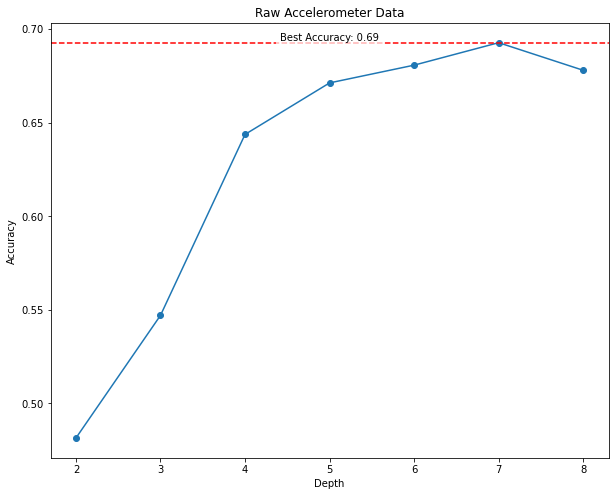

In [ ]:
accuracy = trees(depths, train_df, test_df)
fig = plt.figure(figsize=(10,8))
plt.title("Raw Accelerometer Data")
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depths, accuracy, marker= 'o')
max_acc = max(accuracy)
plt.axhline(y=max_acc, color='r', linestyle='--', label=f'Max ({max_acc:.2f})')
plt.text(5, max_acc, f'Best Accuracy: {max_acc:.2f}', ha='center', va='bottom', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))


In [ ]:
train_features = extract_features(X_train, y_train)
test_features = extract_features(X_test, y_test)

*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\abhin\AppData\Local\Temp\ipykernel_39048\611839100.py:29: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, sample)



*** Feature extraction finished ***


Depth: 2
Accuracy: 0.5
Precision: 0.3016666666666667
Recall: 0.5
Confusion Matrix:
[[9 0 0 0 0 0]
 [9 0 0 0 0 0]
 [7 0 0 2 0 0]
 [0 0 0 9 0 0]
 [0 0 0 9 0 0]
 [0 0 0 0 0 9]]
Depth: 3
Accuracy: 0.7407407407407407
Precision: 0.687593984962406
Recall: 0.7407407407407408
Confusion Matrix:
[[6 3 0 0 0 0]
 [1 7 0 0 1 0]
 [0 9 0 0 0 0]
 [0 0 0 9 0 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]
Depth: 4
Accuracy: 0.8703703703703703
Precision: 0.877032227032227
Recall: 0.8703703703703702
Confusion Matrix:
[[6 1 2 0 0 0]
 [1 8 0 0 0 0]
 [0 2 7 0 0 0]
 [0 0 0 8 1 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]
Depth: 5
Accuracy: 0.8703703703703703
Precision: 0.8712121212121212
Recall: 0.8703703703703702
Confusion Matrix:
[[6 1 2 0 0 0]
 [1 8 0 0 0 0]
 [1 2 6 0 0 0]
 [0 0 0 9 0 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]
Depth: 6
Accuracy: 0.8518518518518519
Precision: 0.8545454545454546
Recall: 0.8518518518518517
Confusion Matrix:
[[6 1 2 0 0 0]
 [1 8 0 0 0 0]
 [1 2 6 0 0 0]
 [0 0 0 8 1 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]
Depth: 7
Acc

Text(5, 0.8888888888888888, 'Best Accuracy: 0.89')

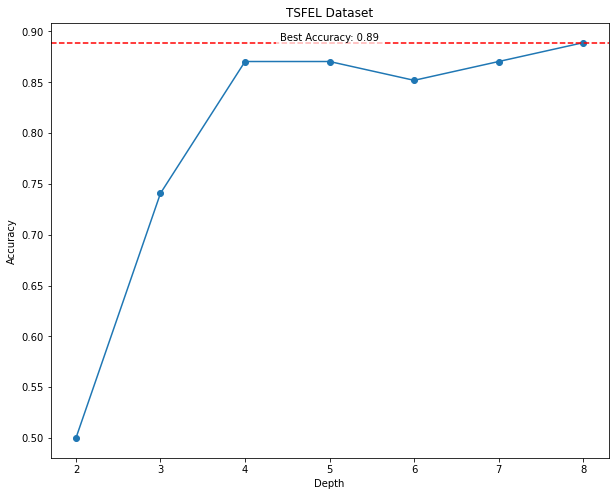

In [ ]:
accuracy = trees(depths, train_features, test_features)
fig = plt.figure(figsize=(10,8))
plt.title("TSFEL Dataset")
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depths, accuracy, marker='o')
max_acc = max(accuracy)
plt.axhline(y=max_acc, color='r', linestyle='--', label=f'Max ({max_acc:.2f})')
plt.text(5, max_acc, f'Best Accuracy: {max_acc:.2f}', ha='center', va='bottom', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

#### Featurized Dataset

In [ ]:
features = []
with open('HAR/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
activity_map = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}

In [ ]:
unique_features = []
counts = {}
for f in features:
    if f not in counts:
        counts[f] = 1
        unique_features.append(f)
    else:
        counts[f] += 1
        unique_features.append(f + '_' + str(counts[f]))

In [ ]:
train_dat = pd.read_csv('HAR/UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None, names=unique_features)
test_dat = pd.read_csv('HAR/UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None, names=unique_features)

In [ ]:
train_dat['activity'] = pd.read_csv('HAR/UCI HAR Dataset/train/Y_train.txt')
test_dat['activity'] = pd.read_csv('HAR/UCI HAR Dataset/test/Y_test.txt')

In [ ]:
# Clean NaN values from train and test data
train_dat = train_dat.dropna()
test_dat = test_dat.dropna()

In [ ]:
train_dat.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5.0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5.0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5.0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5.0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5.0


Depth: 2
Accuracy: 0.5128988458927359
Precision: 0.3023002640951821
Recall: 0.4830291764055597
Confusion Matrix:
[[478   0   0   0   0  18]
 [471   0   0   0   0   0]
 [420   0   0   0   0   0]
 [  0   0   0   0 491   0]
 [ 17   0   0   0 514   0]
 [  0   0   0   0  18 519]]
Depth: 3
Accuracy: 0.6948404616429056
Precision: 0.6393944164196732
Recall: 0.6828782555473224
Confusion Matrix:
[[467   0  11   0   0  18]
 [446   0  25   0   0   0]
 [156   0 264   0   0   0]
 [  0   0   0 389 102   0]
 [ 16   0   1 103 411   0]
 [  3   0   0  15   3 516]]
Depth: 4
Accuracy: 0.8010862186014935
Precision: 0.8091853530408449
Recall: 0.792801614424496
Confusion Matrix:
[[437  30  11   0   0  18]
 [ 85 363  23   0   0   0]
 [ 95  93 232   0   0   0]
 [  0   0   0 408  83   0]
 [  6  10   1 110 404   0]
 [  3   0   0  15   3 516]]
Depth: 5
Accuracy: 0.8129667345553293
Precision: 0.8121067965468663
Recall: 0.8045115618486349
Confusion Matrix:
[[431  16  31   0   0  18]
 [ 40 359  72   0   0   0]
 [ 53 

Text(5, 0.824847250509165, 'Best Accuracy: 0.82')

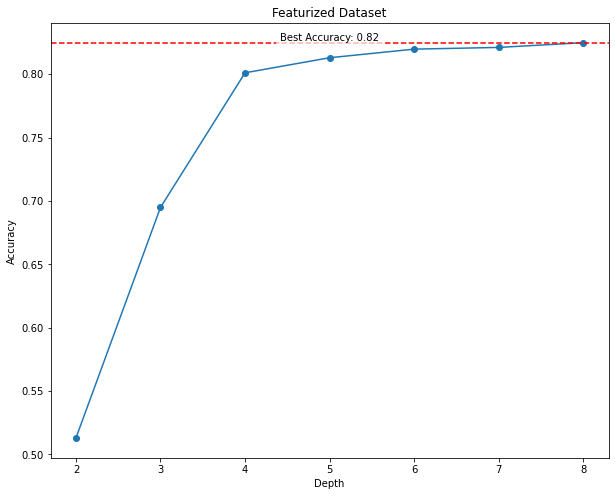

In [ ]:
accuracy = trees(depths, train_dat, test_dat)
fig = plt.figure(figsize=(10,8))
plt.title("Featurized Dataset")
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depths, accuracy, marker = 'o')
max_acc = max(accuracy)
plt.axhline(y=max_acc, color='r', linestyle='--', label=f'Max ({max_acc:.2f})')
plt.text(5, max_acc, f'Best Accuracy: {max_acc:.2f}', ha='center', va='bottom', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))




This is the best case scenario for each model  

| Model                     | Accuracy | Precision | Recall | F1-Score |
|---------------------------|----------|-----------|--------|----------|
| Raw Accelerometer Data    | 0.69     | 0.70      | 0.69   | 0.69     |
| TSFEL Data                | 0.89     | 0.89      | 0.89   | 0.89     |
| Featurized Dataset        | 0.82     | 0.82      | 0.82   | 0.82     |

Since the F1 Score as well as well as accuracy is highest for the TSFEL Data, it is the best model for this scenario.


##### Q3

In [ ]:
import seaborn as sns
def plot_confusion_matrix(ax, depth, train, test, title):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(train.drop('activity', axis=1), train['activity'])
    test_pred = model.predict(test.drop('activity', axis=1))
    cm = confusion_matrix(test['activity'], test_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)
    ax.set_title(f"{title}\nDepth = {depth}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

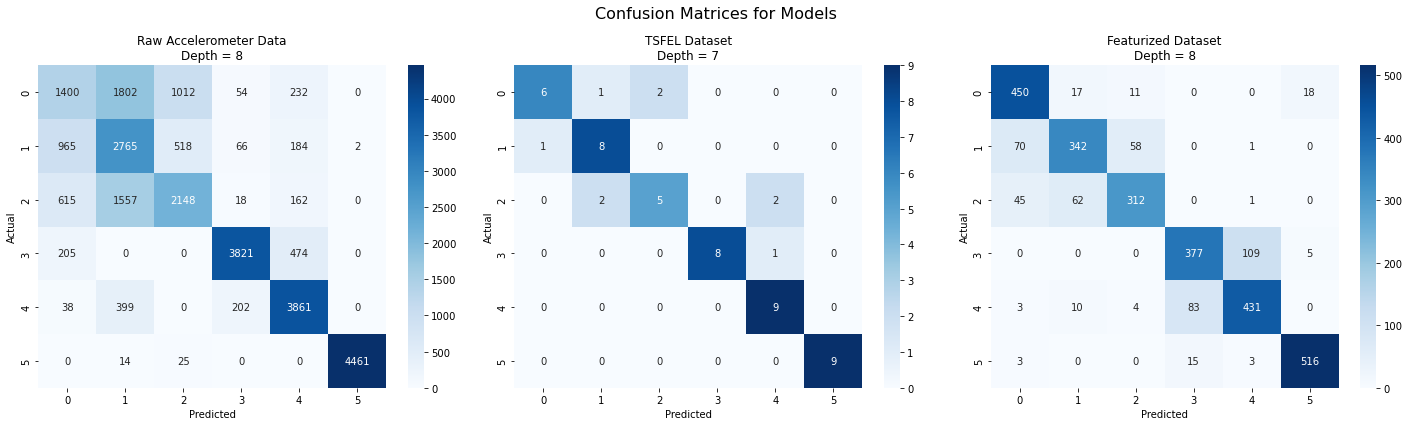

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Confusion Matrices for Models", fontsize=16)
plot_confusion_matrix(ax1, 8, train_df, test_df, "Raw Accelerometer Data")
plot_confusion_matrix(ax2, 7, train_features, test_features, "TSFEL Dataset")
plot_confusion_matrix(ax3, 8, train_dat, test_dat, "Featurized Dataset")
plt.tight_layout()
plt.show() 

It can be observed that across the models, static activities (walking, walking Upstairs and walking downstairs) are often incorrectly predicted as each other. This stems from the three activities being similar in nature and therefore having similar feature data.